# Tutorial  \# 5 Monte Carlo and Bootstrap #

In this tutorial we will use the techniques of Monte Carlo simulation and Bootstrap resampling to estimate the errors in a statistic.

In some situations a statistic might have a known distribution, but in other cases it is not possible to analytically derive the distribution of the statistic.  If we know the statistical distribution of the data and we can simulate data from it numerically, then we can find the distribution of our statistic by repeatedly calculating it on simulated data sets.  This is called a Monte Carlo (MC) simulation or a parametric bootstrap.

The idea is to estimate the expectation value of any statistic $f(\{x\})$ with
\begin{align}
E[f] \simeq E_{\rm mc}[f] \equiv \frac{1}{N_{\rm mc}} \sum_i^{N_{\rm mc} } f\left( \{ x  \}_i  \right)
\end{align}

where the $\{ x \}_i$ is the $i$th simulated data set.  This can be used to find the bias and variance of any statistic as long as you can generate random samples from the distribution.  The estimated bias for a parameter $\theta$ is 
\begin{align}
{\rm bias}_\theta = E_{\rm mc}[\hat{\theta}] - \theta
\end{align}
where $\theta$ is the parameter value used in generating the MC samples and $\hat{\theta}$ is an estimator of that parameter.

An estimate for the variance of this estimator will be
\begin{align}
{\rm Var}_{\rm mc}[\hat{\theta}] &= \frac{1}{(N_{\rm mc}-1) }  \sum_i^{N_{\rm mc} } 
\left( ~ \hat{\theta}\left( \{ x  \}_i  \right)  -  E_{\rm mc}[\hat{\theta}] ~ \right)^2
\end{align}


**Gaussian case:**
First we will investigate the mean and median of a sample drawn from a Gaussian distribution.  In this case we have a library function that will generate deviates from a normal distribution.  We saw in lecture that the sample mean of a sample drawn from a normal distribution is normally distributed with a variance of $\sigma^2/n$. We will verify this using a MC simulation.

In [18]:
# 1) Consider a data set of n=10  drawn from a Normal(0,1) distribution.  
# Create a random data set and find the mean and median of that data set.
import numpy as np
import matplotlib.pyplot as plt

Nsample = 10

data = np.random.normal(size=Nsample)



print('mean = ', np.mean(data))
print('median = ', np.median(data))
print('var = ', np.var(data))



mean =  0.2298782123586876
median =  0.2680665409332339
var =  1.0047686790218255


In [19]:
#2) Find the bias and variance of the sample mean and median by simulating 
#  N_mc=1000 data sets each of size n=10.  Put the above into a loop to find the 
#  bias and variance of the mean and median of sets of 10.

Nmc = 1000
means = np.empty(Nmc)
medians = np.empty(Nmc)
for i in range(0,1000):
    data = np.random.normal(0, 1, size=Nsample)  
    means[i]=np.mean(data)
    medians[i]=np.median(data)
    
mean_bias=np.mean(means) #-0 but it's not important
median_bias=np.mean(medians) 

mean_variance=np.var(means)
median_variance=np.var(medians)

print('Bias of means: ', mean_bias)
print('Bias of medians: ', median_bias)
print('Var of means: ', mean_variance)
print('Var of medians: ', median_variance)


# What is the prediction of theory for the variance of the mean?
# Does the result of this MC experiment agree with theory?
mean_vtheo=1/Nsample
print('The prediction for the variance of the mean = ', mean_vtheo)


#Is the variance of the median larger or smaller than the mean?
print('The variance of the median results to be  larger than the variance of the mean.')

Bias of means:  0.007591757999112838
Bias of medians:  0.004945489573148626
Var of means:  0.10240090261700706
Var of medians:  0.14236210911211658
The prediction for the variance of the mean =  0.1
The variance of the median results to be  larger than the variance of the mean.


We are now going to look at a somewhat more realistic example where the bias and variance of the statistic, in this case an estimator, is not known analytically.  The Schechter luminosity function is used to model the distribution of galaxy luminosities and many other things such as dark matter halo mass functions.  It is given by
\begin{align}
n(L) = \phi_* \left( \frac{L}{L_*}\right)^\alpha ~ e^{-L/L_*}~ \frac{dL}{L_*}
\end{align}
This has three parameters, $ \phi_*$, $\alpha$ and $L_*$.  For galaxies $\alpha \simeq -1.25$, but we will be using the case of $\alpha = -0.3$ (This avoids the complication of it requiring a lower limit to be normalizable.).
We want to measure the value of $L_*$.  The normalization $\phi_*$ will not be relevant because we are interested in the distribution and not the over all density.  An estimator for $L_*$ is 
\begin{align}
\hat{L}_* = \left( \frac{1}{(1+\alpha) n}  \sum_{i=1}^n L_i  \right)
\end{align}
where $L_i$ are the luminosities of each observed galaxy and $n$ is the number of galaxies in the data set.  We want to know if this estimator is biased and what its variance is.


In this case we do not have a library function to get random deviates from this distribution so we will have to build one ourselves.

3) Make a function that takes the luminosity $ x = L/L_*$ and returns the properly normalized pdf for galaxy luminosities.  Take the minimum luminosity to be $x_{min} = 0.0$.
You will find the following integrals useful
\begin{align}
\Gamma(\alpha+1 ) =\int^{\infty}_{0} dx ~x^\alpha ~ e^{-x}
\end{align}
where $\Gamma(\alpha+1) $ is the gamma function.  The 
incomplete gamma function is
\begin{align}
\Gamma(\alpha+1,c, b) =\int^{b}_{c} dx ~x^\alpha ~ e^{-x}
\end{align}
These can be calculated using the mpmath library.


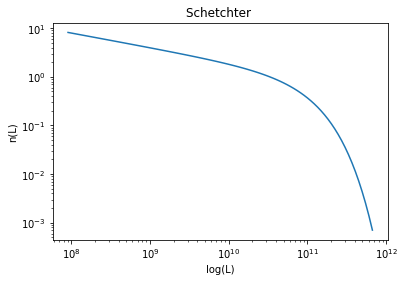

In [20]:
import mpmath as mp

Lstar = 1.0e11
alpha = -0.3



def schechter(x) :
    return (x**alpha)*np.exp(-x)

## vectorize the function so that it will take a vector
schechterV = np.vectorize(schechter)

# Make a plot of the pdf.  To make it look good you will probably need to 
# use plt.x(y)scale('log') to plot it in log scale. Label the axis.

lnx = np.arange(-7,2,0.1) # evenly spaced in log
x = np.exp(lnx)

p = schechterV(x)

L = x*Lstar #ricorda come è definita x

#print(x.shape)#just to better understand

plt.plot(L,p)
plt.yscale('log')
plt.title('Schetchter ')
plt.xscale('log')
plt.xlabel('log(L)')

plt.ylabel('n(L)')
plt.show()

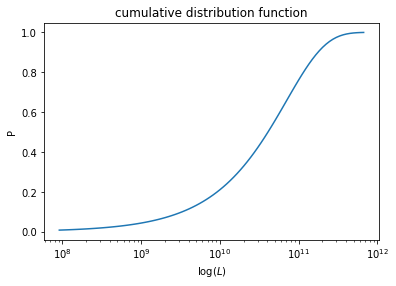

In [21]:
#4) Make a function that returns the cumulative distribution for x = L/Lstar.  
# Call it F.  This should not require summing the above.  You should write it 
# using the incomplete gamma functions.

def F(xx) :
    if(xx <= 0) :
        return 0.0
    else :
        F = mp.gammainc(alpha + 1.0, 0.0, xx, regularized=True)
    return F
    

FV = np.vectorize(F)

cdf = FV(x)



## Plot the cumulative distribution.
## It should go from 0 to 1 if you have used enough of a range in 
## x. Put some labels on it.

plt.plot(x*Lstar,cdf)
plt.title('cumulative distribution function')
plt.xscale('log')
plt.xlabel('log($L$)')
plt.ylabel('P')
plt.show()

Now we want to create a function for generating random deviates from the Schechter distribution. We can do this by inverting the cumulative distribution
 to get the quantile function.  If then put uniform random deviates between 0 and 1 into this function we will get out random deviates drawn from the Schechter distribution.  We will need to invert the cumulative distribution numerically in this case because it cannot be done analytically.

 5) First we need two arrays for pairs of $log(x)$ and $F(x)$.  
 We saw in the plot above that $F(x)$ is smooth if we use 
 $log(x)$ so it is better to interpolate in $log(x)$
 instead of $x$. Because $log(x)$ is not defined at 
 $x=0$ we also need to be sure that the 
 interpolation table covers the range from 
 $F(x) = 0$ to $F(x) = 1$ well enough that all likely 
 values are represented. 

In [22]:
# Arrays for interpolation within the quantile function
lnx_int = np.arange(-7,2,0.1) # evenly spaced in log
x_int = np.exp(lnx_int)
f_int = FV(x_int)
# These arrays need to have different names from above 
# so that they don't change when the variables are reassigned.

## Below is the code for inverting the cumulative 
## distribution "by hand".  You should understand 
## it and then make it more efficient by 
## uncommenting the numpy functions that do the 
## same thing internally.
##
def quantile(u) :
    # if out of bounds
    #if(u <= f_int[0]) :
        #return lnx_int[0]
    #if(u >= f_int[-1]) :
        #return lnx_int[-1]
    # find where u is in f array
    #i=0
    #while(f_int[i] < u):
        #i += 1
    #i -= 1
    #return lnx_int[i] + (u-f_int[i])*(lnx_int[i+1]-lnx_int[i])/(f_int[i+1]-f_int[i])
    return np.interp(u,f_int.astype('float'),lnx_int.astype('float'))

## This makes a vector version of the function
#def quantileV(u) :
    ans = np.empty(len(u))
    for i in range(len(u)) :
        ans[i] = quantile(u[i])
    return ans
    
quantileV = np.vectorize(quantile)

## Now we can draw randomly from the Schechter 
## distribution by passing uniform random numbers
## into the quantile function.
## Here are 1000 luminosities taken from the 
## distribution.

u = np.random.uniform(0,1,1000)
random_lnx = quantileV(u)

print(random_lnx.shape)

(1000,)


 6) Verify that the random numbers created above 
 do in fact come from the Schechter 
 distribution by making the empirical cumulative 
 distribution of them and over-plotting
 the cumulative distribution we found before in 4).

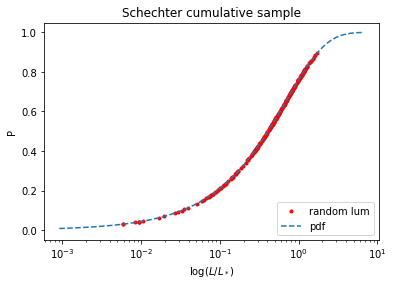

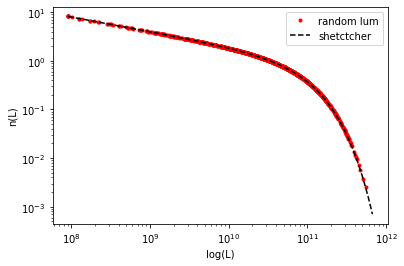

In [23]:
#x sono valori NON logaritmici delle luminosità
#random_L valori LOGARITMICI

plt.plot(random_lnx, FV(random_lnx),'r', marker='.', linestyle='none', label='random lum')
plt.plot(x, cdf, linestyle='--', label='pdf') 
plt.xlabel('log($L/L_*$)')
plt.xscale('log')
plt.ylabel('P')
plt.legend()

plt.title('Schechter cumulative sample')
plt.show()


random_lum = np.exp(random_lnx)*Lstar

pp = schechterV(np.exp(random_lnx))

plt.plot(random_lum, pp, marker='.', linestyle='none', color='red', label='random lum') 
plt.plot(L,p, linestyle='--', color='black', label='shetctcher')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(L)')
plt.ylabel('n(L)')
plt.legend()
plt.show()



 7) Now that we have a way of generating random luminosities we can
   find the bias and variance of the estimator for $L_*$ given above.
   Do 10000 random data sets of 20 galaxies each and find the bias and 
   variance.

In [24]:
#creo lum random == random_L
#per queste calcolo 



Nmc = 5000
Nsample = 20

#Lstar_estimates = np.empty(Nmc)
Lstar_estimate = np.zeros(Nmc)
#var = np.zeros(Nmc)

for i in range(Nmc):

    v = np.random.uniform(0,1,Nsample)   #uso funz quant
    Lrandom = np.exp(quantileV(v))        #genero 20 lum random, è array
    Lrandom *= Lstar

    Lstar_estimate[i] = (1/((1+alpha)*(len(Lrandom))))*np.sum(Lrandom) #stima -array



Lstar_mc = 1/Nmc *np.sum(Lstar_estimate) #media delle stime = Lstar

bias = Lstar_mc - Lstar

print('current estimate for L* =',Lstar_mc/Lstar, 'in unit of 1.e11')

print('bias', bias / Lstar, 'in unit of 1.e11')

print('standard deviation Lstar ', mp.sqrt(np.var(Lstar_estimate))/Lstar )
    





current estimate for L* = 1.0090338501266858 in unit of 1.e11
bias 0.009033850126685792 in unit of 1.e11
standard deviation Lstar  0.266654673292941


 8) If you increase the sample size does the bias 
 and/or variance of the estimator change?  
 Make a plot of the bias and standard deviation 
 as a function of the sample size from 3 to 200 
 skipping every 10 (i.e. Nsample = 3,13,23,..)

In [38]:

sample = np.arange(3,203, 10)
Nmc = 1000


Lstar_mc = np.zeros(Nmc)
mean = np.zeros(len(sample))
bias = np.zeros(len(sample))
std = np.zeros(len(sample))
for j,sam in enumerate(sample):    

    for i in range(Nmc):
        v = np.random.uniform(0,1, size=sam)   #uso funz quantile
        Lrandom = np.exp(quantileV(v))        #genero 20 lum random, è array
        Lrandom *= Lstar
        
        Lstar_mc[i] = (1/((1+alpha)*(len(Lrandom))))*np.sum(Lrandom) #stima per luminosità
                  
    
    mean[j] = np.sum(Lstar_mc) / Nmc
    bias[j] = mean[j] - Lstar
    std[j] = np.std(Lstar_mc)
 
    
    #Lstar_estimates = 1/Nmc *np.sum(Lstar_mc) #estimation for L_star
    
bias /= Lstar
mean /= Lstar
std /= Lstar

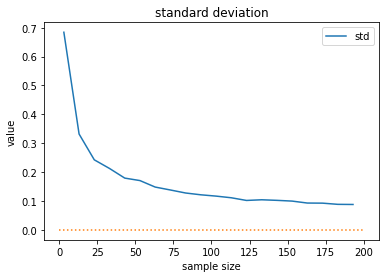

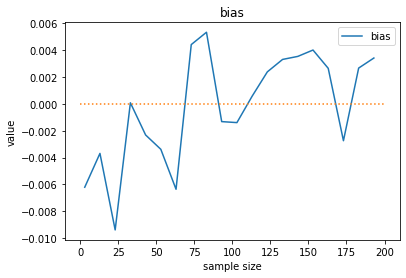

looks like the sample size does affect the std but not the bias in a significant way


In [39]:
plt.plot(sample, std, label='std')
plt.plot([0,200],[0,0],linestyle=':')
plt.xlabel('sample size')
plt.title('standard deviation')
plt.ylabel('value')
plt.legend()
plt.show()
plt.plot(sample, bias, label='bias')
#plt.xscale('log')
plt.xlabel('sample size')
plt.title('bias')
plt.ylabel('value')
plt.legend()
plt.plot([0,200],[0,0],linestyle=':')
plt.show()

print('looks like the sample size does affect the std but not the bias in a significant way')

This estimator of $L_*$ is not very good when $\alpha=-1.25$ (you can try it and see) and so should not be used to fit $L_*$ from real galaxy luminosity data.  The reason for this is that the luminosity function diverges at $L=0$ in this case.  As a result the selection function is always important and the estimator must be modified for this.  

For **extra credit** consider an alternative estimator for $L_*$.  $F(x=1) = 0.76$ (where $x=L/L_*$) so taking the 0.76 quantile of the data might be a good estimator for $L_*$.  This is the data point for which 76\% of the data has a smaller value and 24\% of the data has a larger value.  (The 0.5 quantile is the median.)  You can find functions for doing this in numpy or sort the data yourself.  When there are too few data points (Nsample <~ 5) you can take the maximum data point. 

In [27]:
alpha

-0.3

In [28]:
# 9)
# Write a function that takes the data and returns the new estimate 
# for L_* by returning the 0.76 quantile.

def quantile76(u):        
    sotto = []
    for i in range(len(u)):
        if u[i] <= 1.e11 :
             sotto.append(u[i])
        else: 
                pass
    result = np.array(sotto)
    return result
    

sample = np.arange(13,203, 20)
Nmc = 1000

Lstar_mc = np.zeros(Nmc)
mean = np.zeros(len(sample))
bias = np.zeros(len(sample))
std = np.zeros(len(sample))

for j,sam in enumerate(sample):    

    for i in range(Nmc):
        v = np.random.uniform(0,1, size=sam)   #uso funz quantile
        Lrandom = np.exp(quantileV(v))        #genero 20 lum random, è array
        Lrandom *= Lstar
        
        Lrandom2 = quantile76(Lrandom)
        #print(Lrandom2.shape)
        Lstar_mc[i] = (1/((1+alpha)*(len(Lrandom2))))*np.sum(Lrandom2) #stima per luminosità
                  
    
    mean[j] = np.sum(Lstar_mc) / Nmc
    bias[j] = mean[j] - Lstar
    std[j] = np.std(Lstar_mc)
    
    #Lstar_estimates = 1/Nmc *np.sum(Lstar_mc) #estimation for L_star
    
bias /= Lstar
mean /= Lstar
std /= Lstar


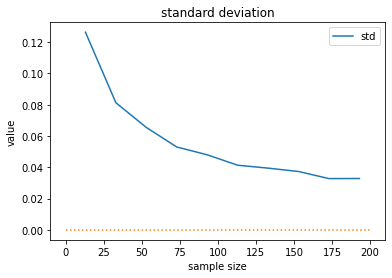

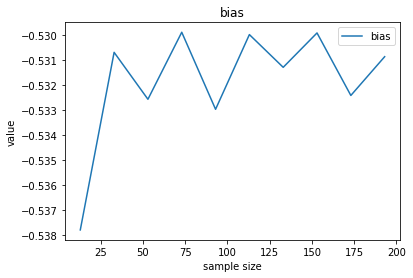

In [37]:
# Plot the bias and variance as a function of sample size as before. 
# These are found by applying estimator to many samples drawn from 
# the distribution.
plt.plot(sample, std, label='std')
plt.plot([0,200],[0,0],linestyle=':')
plt.xlabel('sample size')
plt.title('standard deviation')
plt.ylabel('value')
plt.legend()

plt.show()

plt.plot(sample, bias, label='bias')
plt.xlabel('sample size')
plt.title('bias')
plt.ylabel('value')
plt.legend()
#plt.plot([0,200],[0,0],linestyle=':')
plt.show()
# Is this estimator biased?

#Does it have a lower or higher variance than the estimator we 
#already considered for the same sample size?

## Bootstrap errors ##

Now let's apply the estimator to a data set, but this time we will use bootstrap resampling to estimate the variance of the estimator.  There is noise in the luminosity measurements and we do not know how it is distributed.

Read in the luminosity data from the file `luminosities.csv`.  
Make a loop that resamples this data 2500 times with bootstrap resampling each time. (hint: use np.random.randint() to make a new index each time.)

Make a histogram of the estimated $L_*$s for the bootstrap samples. 

Calculate the standard deviation of the estimated $L_*$ for these samples and report the result.

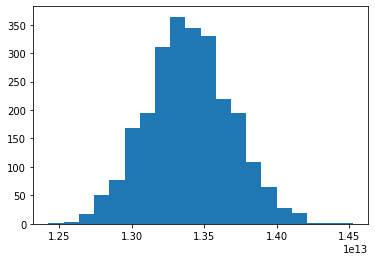

from the data set, L* =  133.97421052293845 in unit of 1.e11
from the bootstrap:
L* =  133.9609167684733  +/-  2.913056435262239


In [30]:
#the bootstrap mean is the same for the sample mean
#I used the jackn8ife resampling
import pandas as pd


df = pd.read_csv('luminosities.csv')
alpha = -0.3
L = df['luminosity']




Lave = np.mean(L)/(alpha + 1)
n = 2500
lstars = np.zeros(n)
for i in range(n) :
    
    index = np.random.randint(0, len(L), len(L))    #this func already take some values twice or more
    lstars[i] = np.mean(L[index])/(alpha + 1)           #stima di L* da formula
    #ho un array dei possibili valori

mean = np.mean(lstars)

#jacknife for the variance

# histogram of lstars
plt.hist(lstars, bins=20)
plt.show()
print('from the data set, L* = ',Lave / Lstar, 'in unit of 1.e11')

print('from the bootstrap:')
print('L* = ',mean/1.0e11 ,' +/- ', np.sqrt(np.var(lstars))/1.e11)

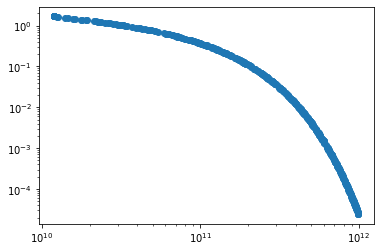

The direct mean from the array is L* =  133.97421052293845
without L > 1.e12 I got L* = 5.805924395992563


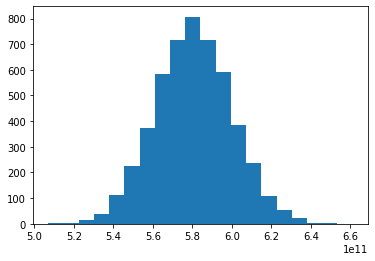

In [31]:
#only for gal with L<1.5e12
alpha = -0.3 
Lum1 = []

for i in range(len(L)):
    if L[i]<1.e12 :
        Lum1.append(L[i])
Lum = np.array(Lum1)

#Lum /= Lstar
sch = schechterV((Lum/Lstar))

plt.scatter(Lum, sch)
plt.xscale('log')
plt.yscale('log')
plt.show()

n = 5000
lstars = np.zeros(n)

for i in range(n) :
    
    index = np.random.randint(0, len(Lum), len(Lum))    #this func already take some values twice or more
    lstars[i] = np.mean(Lum[index])/(alpha + 1)       #stima di L* da formula
    #ho un array dei possibili valori


mean = np.mean(lstars)
mean /= Lstar

print('The direct mean from the array is L* = ',Lave/Lstar)
print('without L > 1.e12 I got L* =',mean)

plt.hist(lstars, bins=20)
plt.show()